Database: Vancouver Airbnb
Motivation: Support Brazilian students who wants to travel abroad to study English, in order to improve a best choice and improve the planner.
Three business questions:
- Can they spend less money at some specific season or period time of the year?
- What are the accommodation information most correlated to price variation?
- Is possible to predict the price for respective acomodation according it features? 


This notebook will cover the first question

In [1]:
#importing some libraries to work with the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


After import some libraries, let's evaluate the content of databases sourced by Airbnb

In [2]:
bc_general = pd.read_csv(r'/content/drive/MyDrive/Vancouver/listings.csv')

In [3]:
bc_general.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,https://www.airbnb.com/rooms/10080,20201106040232,2020-11-06,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...",NaN,https://a0.muscache.com/pictures/55778229/c2f7...,30899,https://www.airbnb.com/users/show/30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",I will be happy to host you.,within an hour,100%,92%,f,https://a0.muscache.com/im/pictures/user/55302...,https://a0.muscache.com/im/pictures/user/55302...,Coal Harbour,49,49,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Downtown,NaN,49.28772,-123.12279,Entire condominium,Entire home/apt,5,NaN,2 baths,2.0,2.0,"[""Dishwasher"", ""TV"", ""Washer"", ""Cable TV"", ""El...",$150.00,90,1124,90,90,1124,1124,90.0,1124.0,NaN,t,4,34,64,339,2020-11-06,16,0,0,2011-11-15,2017-02-26,93.0,9.0,9.0,10.0,9.0,10.0,9.0,18-476608,f,46,46,0,0,0.15
1,13358,https://www.airbnb.com/rooms/13358,20201106040232,2020-11-06,Monthly (or Longer ) Designer One Bedroom Down...,<b>The space</b><br />This suites central loca...,NaN,https://a0.muscache.com/pictures/c23bb7ef-e300...,52116,https://www.airbnb.com/users/show/52116,Lynn,2009-11-07,"Vancouver, British Columbia, Canada",I am from Vancouver and in my free time enjoy ...,within a day,80%,83%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Downtown Vancouver,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",f,t,NaN,West End,NaN,49.28209,-123.12515,Entire condominium,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Dishwasher"", ""TV"", ""Washer"", ""Cable TV"", ""El...",$85.00,30,60,30,30,60,60,30.0,60.0,NaN,t,1,31,60,60,2020-11-06,429,2,0,2010-06-22,2020-10-03,93.0,9.0,10.0,9.0,10.0,10.0,9.0,18-611603,f,1,1,0,0,3.39
2,13490,https://www.airbnb.com/rooms/13490,20201106040232,2020-11-06,Vancouver's best kept secret,This apartment rents for one month blocks of t...,"In the heart of Vancouver, this apartment has ...",https://a0.muscache.com/pictures/73394727/79d5...,52467,https://www.airbnb.com/users/show/52467,Iris,2009-11-08,"Vancouver, British Columbia, Canada",Hello! My husband Fred and I are actors living...,within an hour,100%,83%,t,https://a0.muscache.com/im/users/52467/profile...,https://a0.muscache.com/im/users/52467/profile...,Kensington-Cedar Cottage,4,4,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Vancouver, British Columbia, Canada",Kensington-Cedar Cottage,NaN,49.25550,-123.06696,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Wifi"", ""Lake access"", ""TV"", ""Washer"", ""Fire ...",$145.00,30,90,30,30,90,90,30.0,90.0,NaN,t,5,35,62,281,2020-11-06,88,4,1,2011-06-02,2020-10-31,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0

In [4]:
bc_calendar = pd.read_csv(r'/content/drive/MyDrive/Vancouver/calendar.csv')

In [5]:
bc_calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2003897,2020-11-06,f,$120.00,$120.00,120,1125
1,13358,2020-11-06,f,$85.00,$85.00,30,60
2,13358,2020-11-07,f,$85.00,$85.00,30,60
3,13358,2020-11-08,f,$85.00,$85.00,30,60
4,13358,2020-11-09,f,$85.00,$85.00,30,60
5,13358,2020-11-10,f,$85.00,$85.00,30,60
6,13358,2020-11-11,f,$85.00,$85.00,30,60
7,13358,2020-11-12,f,$85.00,$85.00,30,60
8,13358,2020-11-13,f,$85.00,$85.00,30,60
9,13358,2020-11-14,f,$85.00,$85.00,30,60


After an overview analysis about what kind of information we have, was decided to use the calendar database for this first business question.

In [6]:
bc_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727910 entries, 0 to 1727909
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 92.3+ MB


Notice the price is as an object. So, to make a temporal analysis should be changed to float

In [7]:
import re
bc_calendar['price'] = [float(re.sub('[^0-9\.]', '', price)) for price in bc_calendar['price']]

In [8]:
bc_calendar['price']

0          120.0
1           85.0
2           85.0
3           85.0
4           85.0
           ...  
1727905    150.0
1727906    150.0
1727907    150.0
1727908    150.0
1727909    150.0
Name: price, Length: 1727910, dtype: float64

In [9]:
bc_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727910 entries, 0 to 1727909
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  object 
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 92.3+ MB


Let's check the range of dates

In [10]:
print(bc_calendar['date'].min())
print(bc_calendar['date'].max())

2020-11-06
2021-11-05


Grouping the prices with respective accommodation id, and making some analysis to identify if we have price information for all dates for each accommodation. In case yes, we can use an average of prices to evaluate it behavior.

In [11]:
price = bc_calendar.groupby(['listing_id','date'])['price'].sum().reset_index()
price

,listing_id,date,price
0,10080,2020-11-06,150.0
1,10080,2020-11-07,150.0
2,10080,2020-11-08,150.0
3,10080,2020-11-09,150.0
4,10080,2020-11-10,150.0
...,...,...,...
1727905,46261278,2021-11-01,142.0
1727906,46261278,2021-11-02,132.0
1727907,46261278,2021-11-03,142.0
1727908,46261278,2021-11-04,152.0


In [12]:
teste = price[price['listing_id'] == 10080]

In [13]:
teste

,listing_id,date,price
0,10080,2020-11-06,150.0
1,10080,2020-11-07,150.0
2,10080,2020-11-08,150.0
3,10080,2020-11-09,150.0
4,10080,2020-11-10,150.0
...,...,...,...
360,10080,2021-11-01,150.0
361,10080,2021-11-02,150.0
362,10080,2021-11-03,150.0
363,10080,2021-11-04,150.0


We have the prices for 1 year, for each acccommodation, in other words we can use the average.

In [14]:
print(price['date'].isna().sum())
print(price['price'].isna().sum())

0
0


In [15]:
price = price.drop('listing_id', axis = 1)

Putting date as index in order to plot the temporal series.

In [16]:
price = price.set_index('date')
price.index = pd.to_datetime(price.index)
price.index

DatetimeIndex(['2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09',
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15',
               ...
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05'],
              dtype='datetime64[ns]', name='date', length=1727910, freq=None)

In [17]:
price = price.resample('M').mean()

Checking the index...

In [18]:
price.index.unique()

DatetimeIndex(['2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30'],
              dtype='datetime64[ns]', name='date', freq=None)

In [19]:
y = price['price']
y['2021':]

date
2021-01-31    160.743428
2021-02-28    160.651752
2021-03-31    163.321054
2021-04-30    166.073539
2021-05-31    169.787508
2021-06-30    172.224250
2021-07-31    173.759952
2021-08-31    173.825463
2021-09-30    170.586544
2021-10-31    168.588965
2021-11-30    168.589480
Freq: M, Name: price, dtype: float64

In [20]:
y = y[-11:]

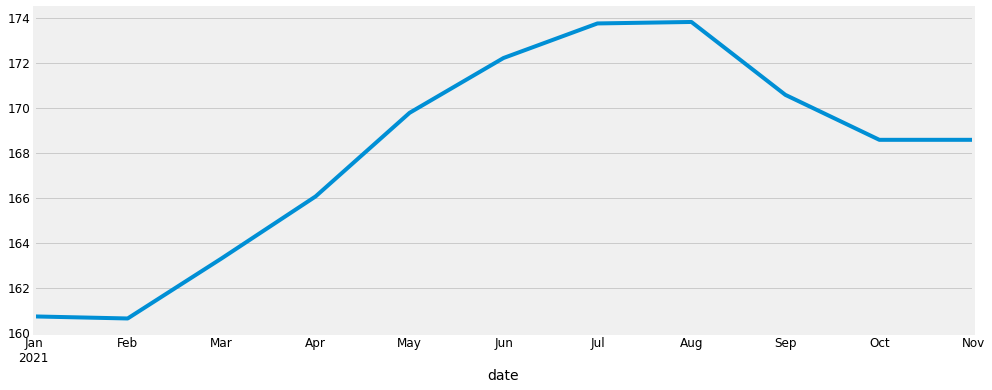

In [21]:
y.plot(figsize=(15, 6))
plt.show()
